In [1]:
# import libraries
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

# Mean-squared error

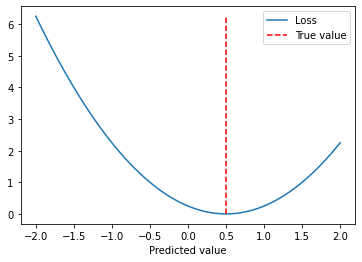

In [3]:
# Loss function
loss_func_MSE = nn.MSELoss()

# Create predictions and real answer
y_hat = torch.linspace(start=-2, end=2, steps=101)
y     = torch.tensor(0.5)

# Compute MSE loss function
L = np.zeros(shape=101)
for i, answer_i in enumerate(y_hat):
  L[i] = loss_func_MSE(answer_i, y)

plt.plot(y_hat, L, label='Loss')
plt.plot([y, y], [0, np.max(L)], 'r--', label='True value')
plt.xlabel('Predicted value')
plt.legend()
plt.show()

# Binary cross-entropy

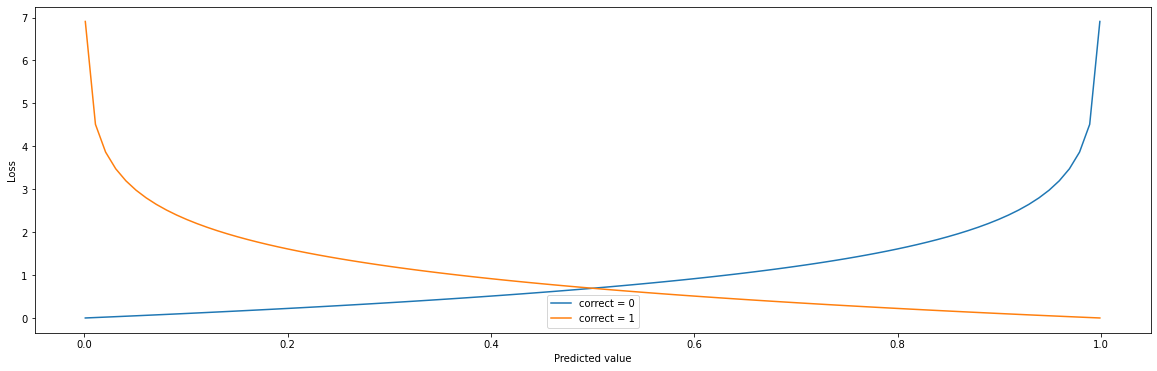

In [5]:
# Loss function
loss_func_BCE = nn.BCELoss()

# Create predictions and real answer
y_hat = torch.linspace(start=0.001, end=0.999, steps=101)
y1    = torch.tensor(0.0)
y2    = torch.tensor(1.0)

# Compute MSE loss function
L = np.zeros(shape=(101, 2))
for i, answer_i in enumerate(y_hat):
  L[i, 0] = loss_func_BCE(answer_i, y1) # 0 is the correct answer
  L[i, 1] = loss_func_BCE(answer_i, y2) # 1 is the correct answer

plt.figure(figsize=(20, 6))
plt.plot(y_hat, L)
plt.xlabel('Predicted value')
plt.ylabel('Loss')
plt.legend(['correct = 0', 'correct = 1'])
plt.show()

In [7]:
# The example above shows data already in probabilities. Raw outputs will need to be converted to probabilities:

# "raw" output of a model
# y_hat = torch.tensor(2.)
# print(loss_func_BCE(y_hat, y2))

# Convert to prob via sigmoid
sigmoid = nn.Sigmoid()
print(loss_func_BCE(sigmoid(y_hat), y2))

tensor(0.1269)


In [8]:
# However, PyTorch recommends using a single function that incorporates sigmoid+BCE due to increased numerical stability.
# https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html?highlight=nn%20bcewithlogitsloss#torch.nn.BCEWithLogitsLoss


# Thus, the recommended way to do it:
loss_func_BCE = nn.BCEWithLogitsLoss()
y_hat         = torch.tensor(2.)
print(loss_func_BCE(y_hat, y2))

# In toy examples, numerical accuracy usually isn't a problem.

tensor(0.1269)


# Categorical cross-entropy

In [9]:
# Loss function
loss_func_CCE = nn.CrossEntropyLoss()

# Vector of output layer (pre-softmax)
y_hat = torch.tensor([[1.0, 4, 3]])

for i in range(3):
  correct_answer = torch.tensor([i])
  this_loss      = loss_func_CCE(y_hat, correct_answer).item()
  print(f'Loss when correct answer is {i}: {this_loss}')


Loss when correct answer is 0: 3.3490121364593506
Loss when correct answer is 1: 0.349012166261673
Loss when correct answer is 2: 1.3490121364593506


In [11]:
# Repeat using pre-softmaxified output
softmax = nn.Softmax(dim=1)
y_hat_sm = softmax(y_hat)

for i in range(3):
  correct_answer = torch.tensor([i])
  this_loss      = loss_func_CCE(y_hat_sm, correct_answer).item()
  print(f'Loss when correct answer is {i}: {this_loss}')

Loss when correct answer is 0: 1.436583399772644
Loss when correct answer is 1: 0.7663178443908691
Loss when correct answer is 2: 1.2122058868408203


In [12]:
# Compare raw, softmax, and log-softmax outputs
softmax = nn.LogSoftmax(dim=1)
y_hat_logsm = softmax(y_hat)

# Print them
print(y_hat)
print(y_hat_sm)
print(y_hat_logsm)

tensor([[1., 4., 3.]])
tensor([[0.0351, 0.7054, 0.2595]])
tensor([[-3.3490, -0.3490, -1.3490]])


# Creating your own custom loss function

In [13]:
class my_loss(nn.Module):
  def __init__(self):
    super().__init__()

  def forward(self, x, y):
    loss = torch.abs(x - y)

    return loss

# TEST
loss_func = my_loss()
loss_func(torch.tensor(4), torch.tensor(5.2))

tensor(1.2000)